<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/GIS1_1_IntroToGeopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用(1-1)：GeoPandas を触ってみる
地理情報とは（平たく言えば）緯度・経度といった位置情報と経済データ・植生データ等を重ね，政策立案等に活かすことを目指している。また，地理情報を扱うシステムを GIS（Geographic Information System)と呼ぶ。

さらに「地理情報」を「地理空間情報」と呼ぶ場合もある。
これは

- 空間的な情報：地球上での位置や形状に関するデータ

を強く意識した用語である。また，「空間的な情報」に紐づけられる（前述の）経済データや植生データを「属性情報」と呼ぶ。

地理情報の活用に関して，ESRI社が牽引している。

（参考）GIS基礎解説：地理情報と GIS データモデル

https://www.esrij.com/gis-guide/gis-datamodel/gis-datamodel/

---
## GeoPandas のインストール (Google Colab の場合)
Python にて**地理情報を扱うためのライブラリ**が **GeoPandas** である。

GeoPandas とは pandasの拡張で，**地理情報を含むデータをpandasのように表形式で扱うことができるGIS系のPythonライブラリ**である。

Google Colab にはデフォルトで GeoPandas がインストールされていないため，これをインストールする。

なお，GeoPandas をインストールすると，以下のパッケージも併せてインストールされる。
- geopanda
- Fiona
- pyporj

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 26.1 MB/s 
     |████████████████████████████████| 6.3 MB 46.5 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


---
## geopandas で世界地図の表示 & データの活用
どのサイトを見ても，最初は geppandas 付随のデータを利用し，世界地図を表示するものらしい。

以下では geopandas に含まれるデータセット(dataset)のうち 'naturalearth_lowres' を読み込んでいる。データセットを指定し，read_file() メソッドに渡すことでデータを読み込める。

また，pandas にて扱う地理情報のデータ型を 'geopandas.geodataframe.GeoDataFrame' である。

In [ ]:
import geopandas
import matplotlib.pyplot as plt

dataset = geopandas.datasets.get_path('naturalearth_lowres') # データセットの指定
world = geopandas.read_file(dataset) # データセットの読み込み

print(type(world)) # データ型の確認

<class 'geopandas.geodataframe.GeoDataFrame'>


#### 読み込んだデータの可視化
GeoDataFrame に対して plot() メソッドを適用することで可視化できる。

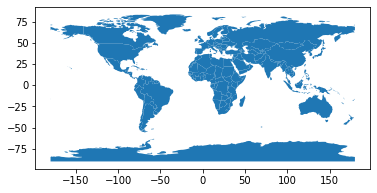

In [ ]:
world.plot()

#### 変数 world の中身をみてみよう
pandas と同様，表形式でデータが格納されている。
各列の意味は次のとおりである。
- continent : 大陸名
- name : 国名
- iso_a3 : 国コード
- geometry : 地形を表す図形
- pop_est : 人口 (推定値)
- gdp_md_est : GDP (推定値)

ここで geometry には次の値がある。
- 領域を表す POLYGON
- 複数の領域が集合した MULTOPLYGON
- 線を表す LINE
- 点を表す POINT

以下では オセアニア(Oceania)大陸に属するフィジー(Fiji)が MULTIPOLYGON で，またアフリカ(Africa)大陸に属するタンザニア(Tanzania)が POLYGON で表現されている

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### 日本のデータのみ抽出 ＆ 可視化
特定の行を抽出する方法は Pandas と同様，条件を与えて所望の行を抽出する。

以下に日本(Japan)のデータを取り出すコードを示す。geometry が MULTIPOLYGON で構成されているのは，九州，本州，四国，北海道および複数の島々が存在するためである。

In [ ]:
# 日本のデータのみを抽出
japan = world[world['name']=='Japan']

# データ Japan の中身を確認
japan

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


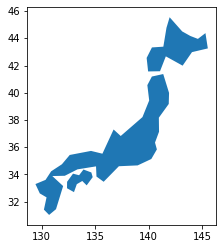

In [ ]:
# 可視化してみたが，島々が反映されていない。
# 世界地図から抜き出したため，細かい箇所はカットされている？
japan.plot()

---
## 属性情報の可視化
改めて world の中身を見てみると，pop_est (人口) および gdp_md_est (国内総生産) の値が含まれている。

(メモ) gdp_md は　million dollar 単位での GDP という意味だろう。（多分）

In [ ]:
# 改めてデータ world を確認
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


人口を世界地図に反映させるには plot(columns='列名') と指定する。

以下に人口を各国の領域に反映させた結果を示す。

(注) 南極大陸には定住する住民がいないため，地理情報(GeoDataFrame)から除去する。

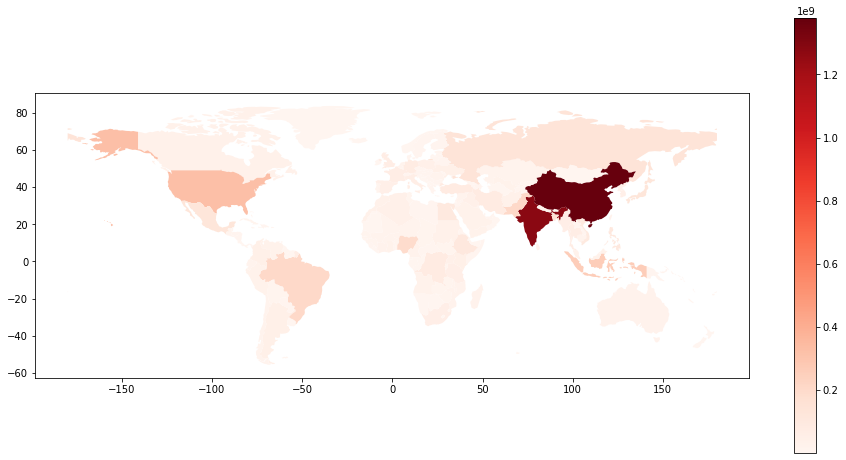

In [ ]:
# 南極大陸 (Antarctica) を除去した上で pop_est (country population)に基づき色付け
world = world[world.name != 'Antarctica'] # 南極大陸の除去
world.plot(column='pop_est', cmap='Reds', legend=True, figsize=(16,8)) # 可視化

## （演習）各国の GDP を可視化してみよう
列 'gdp_md_est' の値は国内総生産 (GDP) であり，これは「一定期間に同一の国に居住する人々によって生産され，稼ぎ出された最終生産物の価値額」とされる。当然，人口の多い国は GDP も大きくなりがちである（逆もしかり）。

そこで，予め人口で割り算することで「国民１人あたりの GDP」を求めておく。

In [ ]:
world = world[world.name != 'Antarctica'] # 南極大陸の除去
world['gdp_per_capta'] = world['gdp_md_est'] / world['pop_est'] # 国民一人あたりの GDP

# ここに可視化のコードを書く